<a href="https://colab.research.google.com/github/ekakrtn/Tugas-Praktikum-DataMining/blob/main/Tugas_Praktikum9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import Library
!pip install openpyxl
!pip install xlrd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#if os.path.exists(file_path_test) dan os.path.exists(file_path_train):
df_1 = pd.read_excel("kelulusan_test.xls")
df_2 = pd.read_excel("kelulusan_train.xls")

In [22]:
# Memanggil variabel  test
df_1
# Memanggil variabel train
df_2

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [23]:
# Mencari statistika
df_1.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,141.000000,142.000000
mean,24.475862,2.882345,2.893862,2.857310,2.990828,2.932552,2.903034,2.579379,1.932695,2.949859
std,2.395258,0.358099,0.414159,0.540566,0.513567,0.423699,0.591917,0.746163,1.509900,0.489989
min,22.000000,1.790000,0.500000,0.160000,0.320000,1.130000,0.000000,0.000000,0.000000,0.870000
25%,23.000000,2.620000,2.660000,2.480000,2.770000,2.700000,2.650000,2.250000,0.000000,2.820000
50%,24.000000,2.900000,2.910000,2.930000,3.000000,2.980000,2.940000,2.640000,2.600000,3.035000
75%,25.000000,3.100000,3.140000,3.270000,3.270000,3.240000,3.310000,3.150000,3.000000,3.237500
max,40.000000,3.710000,3.790000,3.960000,3.910000,3.780000,3.940000,3.910000,4.000000,3.850000


In [32]:
# Mencari statistika
df_2.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.387882,0.458449
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.750000
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.830000,3.000000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.725000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [24]:
# Periksa nilai null di kelulusan test
df_1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [26]:
# Periksa nilai null di kelulusan train
df_2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [29]:
# Penanganan Nilai yang Hilang (Missing Values) ---
# Mengisi nilai yang hilang pada kolom 'IPK' dan 'IPS 8' dengan nilai rata-rata
for df in [df_1, df_2]:
    df['IPK '].fillna(df['IPK '].mean(), inplace=True)
    # Mengisi nilai yang hilang pada kolom 'IPS 8' dengan nilai rata-rata
    df['IPS 8'].fillna(df['IPS 8'].mean(), inplace=True)

<ipython-input-29-0ce8f97d9675>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IPK '].fillna(df['IPK '].mean(), inplace=True)
<ipython-input-29-0ce8f97d9675>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [30]:
# Periksa nilai null di kelulusan test
df_1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [31]:
# Periksa nilai null di kelulusan train
df_2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [33]:
# Fitur (X) dan target (y) pada data train
X_train = df_1.drop(['STATUS KELULUSAN', 'NAMA', 'JENIS KELAMIN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1)
y_train = df_1['STATUS KELULUSAN']

# Fitur (X) dan target (y) pada data test
X_test = df_2.drop(['STATUS KELULUSAN', 'NAMA', 'JENIS KELAMIN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1)
y_test = df_2['STATUS KELULUSAN']

# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi data train
X_train = scaler.fit_transform(X_train)

# Standarisasi data test
X_test = scaler.transform(X_test)

In [34]:
# Inisialisasi model K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Parameter n_neighbors bisa diubah
# Latih model dengan data train
knn.fit(X_train, y_train)
# Prediksi data test
y_pred = knn.predict(X_test)

In [35]:
# --- 6. Training Model ---
# Inisialisasi model KNN dengan k=5 (bisa diubah)
model = KNeighborsClassifier(n_neighbors=5)

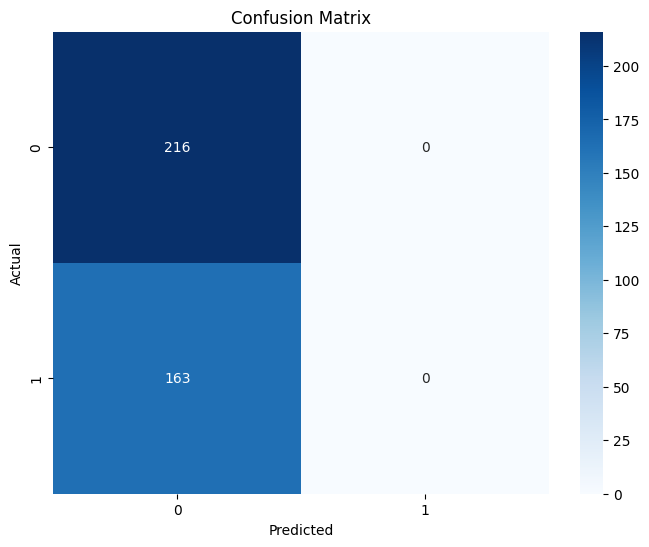

In [36]:
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Melakukan prediksi
y_pred = knn.predict(X_test)

#Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



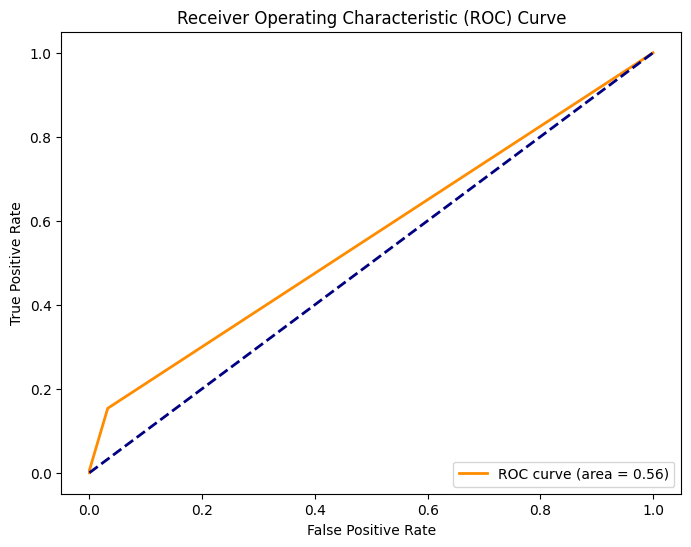

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer
# Konversi target ke format biner jika perlu
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)  # Konversi ke 0/1 jika target kategori
# Hitung probabilitas prediksi
y_score = knn.predict_proba(X_test)[:, 1]
# Hitung FPR, TPR, dan AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)
# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
plt.show()

In [40]:
#Evalusai model
y_pread = knn.predict(X_test)

#confusion matrix dan classification Report
print("Confusion_matrix:\n",  confusion_matrix(y_test, y_pread))
print("\nc\Classification_report:\n", classification_report(y_test, y_pread))

Confusion_matrix:
 [[216   0]
 [163   0]]

c\Classification_report:
               precision    recall  f1-score   support

       TEPAT       0.57      1.00      0.73       216
   TERLAMBAT       0.00      0.00      0.00       163

    accuracy                           0.57       379
   macro avg       0.28      0.50      0.36       379
weighted avg       0.32      0.57      0.41       379



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
